# take to .csv files (from eval and 5adv analyses) and merge them into one with all pairs

In [1]:
import numpy as np
from tqdm.auto import tqdm
from ap_rllib.config import get_trainer, get_config_by_name
import os
import pandas as pd
import ray

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
files = ['/tmp/to_eval_5adv.csv', '/tmp/to_eval_1adv_eval.csv']

In [3]:
dfs = [pd.read_csv(f) for f in files]

In [4]:
# need ray for parallel evaluation
ray.shutdown()
ray.init(num_cpus=28, ignore_reinit_error=True, log_to_driver=False)

2020-12-08 06:29:35,865	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '128.32.175.10',
 'raylet_ip_address': '128.32.175.10',
 'redis_address': '128.32.175.10:13157',
 'object_store_address': '/tmp/ray/session_2020-12-08_06-29-35_005056_15499/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-12-08_06-29-35_005056_15499/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2020-12-08_06-29-35_005056_15499',
 'metrics_export_port': 57385,
 'node_id': '74a9a479e1656975c8a2071146e35101816b64d7'}

In [5]:
config = 'external_test'
config_ = get_config_by_name(config)
config_['_verbose'] = False
config_['_policies'] = [None, 'pretrained', 'pretrained']
trainer = get_trainer(config_)

2020-12-08 06:29:40,586	INFO trainer.py:588 -- Executing eagerly, with eager_tracing=False
2020-12-08 06:29:40,588	INFO trainer.py:1064 -- `_use_trajectory_view_api` only supported for PyTorch so far! Will run w/o.
2020-12-08 06:29:40,589	INFO trainer.py:617 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Create

2020-12-08 06:29:42,060	WARNING catalog.py:333 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!


Setting NN weights
Loading normalization
It looks like variables ["<tf.Varaible player_1/param/clip:0 shape=(1,) <dtype: 'float32'>>", "<tf.Varaible dense_1/kernel:0 shape=(64, 64) <dtype: 'float32'>>", "<tf.Varaible dense_1/bias:0 shape=(64,) <dtype: 'float32'>>", "<tf.Varaible player_1/param/mean:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible dense/kernel:0 shape=(380, 64) <dtype: 'float32'>>", "<tf.Varaible player_1/param/std:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible mean/bias:0 shape=(17,) <dtype: 'float32'>>", "<tf.Varaible player_1/param/mean:0 shape=(1,) <dtype: 'float32'>>", "<tf.Varaible player_1/param/mean:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible player_1/param/clip:0 shape=(1,) <dtype: 'float32'>>", "<tf.Varaible player_1/sequential/h2/bias:0 shape=(64,) <dtype: 'float32'>>", "<tf.Varaible player_1/sequential/value/kernel:0 shape=(64, 1) <dtype: 'float32'>>", "<tf.Varaible mean/kernel:0 shape=(64, 17) <dtype: 'float32'>>", "<tf.Varaible player_1/param/

2020-12-08 06:29:43,304	WARNING catalog.py:333 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!


Setting NN weights
Loading normalization
Setting NN weights
Loading normalization
It looks like variables ["<tf.Varaible player_2/param/std:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible player_2/sequential_2/h1/bias:0 shape=(64,) <dtype: 'float32'>>", "<tf.Varaible player_2/sequential_2/h2/kernel:0 shape=(64, 64) <dtype: 'float32'>>", "<tf.Varaible player_2/param/mean:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible player_2/sequential_2/h2/bias:0 shape=(64,) <dtype: 'float32'>>", "<tf.Varaible player_2/param/mean:0 shape=(380,) <dtype: 'float32'>>", "<tf.Varaible player_2/param/mean:0 shape=(1,) <dtype: 'float32'>>", "<tf.Varaible player_2/sequential_2/value/bias:0 shape=(1,) <dtype: 'float32'>>", "<tf.Varaible dense_4/bias:0 shape=(64,) <dtype: 'float32'>>", "<tf.Varaible dense_5/kernel:0 shape=(64, 64) <dtype: 'float32'>>", "<tf.Varaible player_2/sequential_2/value/kernel:0 shape=(64, 1) <dtype: 'float32'>>", "<tf.Varaible player_2/param/clip:0 shape=(1,) <dtype: 'float32'>>"

2020-12-08 06:29:43,684	WARNING util.py:40 -- Install gputil for GPU system monitoring.


Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents


In [7]:
import logging
logging.basicConfig(level=logging.WARNING)

In [ ]:
policies = ['player_1', 'player_2']
data = {p: [] for p in policies} # format: p -> [(name, hash, weights)]

for f in tqdm(files):
    for _, r in tqdm(pd.read_csv(f).iterrows(), leave=False):
        trainer.restore(r.checkpoint_rllib)
        for p in policies:
            name = r[p]
            weights = trainer.get_weights()[p]
            hash_ = sum([np.sum(t) for t in weights])
            data[p].append((name, hash_, weights))

In [20]:
unique_names

{'player_1': {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  5100,
  5102,
  5103,
  5104,
  5105,
  5106,
  5107,
  5108,
  5109,
  5110,
  5111,
  5112,
  5200,
  5202,
  5203,
  5204,
  5205,
  5206,
  5207,
  5208,
  5209,
  5210,
  5211,
  5212,
  5300,
  5302,
  5303,
  5304,
  5305,
  5306,
  5307,
  5308,
  5309,
  5310,
  5311,
  5312,
  5400,
  5402,
  5403,
  5404,
  5405,
  5406,
  5407,
  5408,
  5409,
  5410,
  5411,
  5412,
  5500,
  5502,
  5503,
  5504,
  5505,
  5506,
  5507,
  5508,
  5509,
  5510,
  5511,
  5512},
 'player_2': {34,
  36,
  37,
  38,
  40,
  41,
  42,
  43,
  44,
  45,
  5000,
  5002,
  5003,
  5004,
  5005,
  5006,
  5007,
  5008,
  5009,
  5010,
  5011,
  5012}}

In [9]:
unique_names = {p: set(d[0] for d in data[p]) for p in policies}

In [10]:
# checking that hashes match for the same name
for p in policies:
    for n in unique_names[p]:
        vals = [d for d in data[p] if d[0] == n]
        hashes = [v[1] for v in vals]
        assert all([hashes[0] == h for h in hashes])

In [11]:
# only unique names
data_u = {p: [] for p in policies}
for p in policies:
    for n in unique_names[p]:
        val = [d for d in data[p] if d[0] == n][0]
        data_u[p].append(val)

In [22]:
len(data_u['player_1']) * len(data_u['player_2'])

2332

In [12]:
# checking that got all the agents
total_players_df = {p: sum([len(set(df[p])) for df in dfs]) for p in policies}
for p in policies:
    assert len(data_u[p]) == total_players_df[p]

In [13]:
from uuid import uuid1

In [14]:
# saving the output!
ds = []
for p1name, _, p1w in data_u['player_1']:
    for p2name, _, p2w in data_u['player_2']:
        d = {'player_1': p1name, 'player_2': p2name}
        trainer.set_weights({'player_1': p1w, 'player_2': p2w})
        ckpt = trainer.save(f"/tmp/{uuid1()}")
        w_hash = sum([sum([np.sum(t) for t in y]) for y in trainer.get_weights().values()])
        d['checkpoint_rllib'] = ckpt
        d['hash'] = w_hash
#         print(p1name, p2name)
    
        for d_other in ds:
            if d_other['hash'] == d['hash']:
                print("Potential collision", d, d_other)
                
        ds.append(d)

In [15]:
hashes = [x['hash'] for x in ds]
assert len(hashes) == len(set(hashes)), "Some pairs are the same"

In [16]:
fn = "/tmp/to_eval_all.csv"
df_to_eval = pd.DataFrame(ds)
df_to_eval.to_csv(fn, index=False)

In [17]:
df_to_eval

,player_1,player_2,checkpoint_rllib,hash
0,0,5000,/tmp/e72400bc-3961-11eb-85ce-1831bf455a80/chec...,4420.587047
1,0,5002,/tmp/e72400bd-3961-11eb-85ce-1831bf455a80/chec...,4389.690206
2,0,5003,/tmp/e72400be-3961-11eb-85ce-1831bf455a80/chec...,4372.916389
3,0,5004,/tmp/e72400bf-3961-11eb-85ce-1831bf455a80/chec...,4412.166457
4,0,5005,/tmp/e72400c0-3961-11eb-85ce-1831bf455a80/chec...,4418.325421
...,...,...,...,...
2327,5112,41,/tmp/faf8b9ff-3961-11eb-85ce-1831bf455a80/chec...,4451.015669
2328,5112,42,/tmp/faf8ba00-3961-11eb-85ce-1831bf455a80/chec...,4470.394853
2329,5112,43,/tmp/faf8ba01-3961-11eb-85ce-1831bf455a80/chec...,4435.065287
2330,5112,44,/tmp/faf8ba02-3961-11eb-85ce-1831bf455a80/chec...,4465.460510


In [23]:
def weights_equal(w1, w2):
    """List of weights == another list of weights?"""
    assert len(w1) == len(w2)
    for a, b in zip(w1, w2):
        if not np.allclose(a, b):
            return False
    return True

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

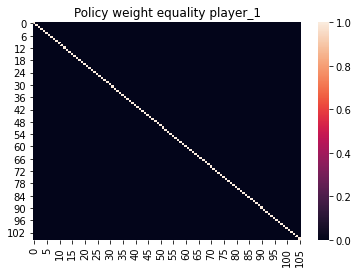

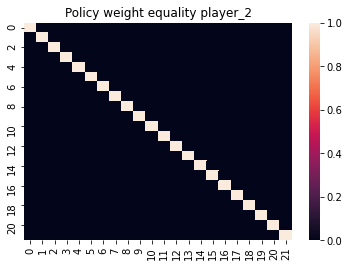

In [28]:
for p in policies:
    plt.title(f"Policy weight equality {p}")
    weq = [[weights_equal(x[2], y[2]) for x in data_u[p]] for y in data_u[p]]
    sns.heatmap(weq)
    plt.show()